### Problema 2 - Fruits and Vegetables Recognizer:
### Parte 1°

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
str_base_path = '/content/drive/MyDrive/Colab Notebooks/TMIP_B_2024'

### Data Aumentation y InputData Flow para Train

In [3]:
data_train_path = str_base_path + '/train_set/' # caso colab


# mecanismo de data Aumentation para generar variaciones en las imágenes originales.
train_data_generator = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

# carga y reconfiguración de imágenes de entrada para clasificación binaria.
train_data_flow = train_data_generator.flow_from_directory(
    data_train_path,
    target_size = (64, 64), #tamaño estandar de imágenes para entrenamiento
    batch_size = 32, # tamaño del batch de entrenamiento
    class_mode = 'categorical' # problema de clasificación categorical
)

Found 717 images belonging to 6 classes.


### Data Aumentation y InputData Flow para Test

In [4]:
data_test_path = '/images/test_set' # caso VS
data_test_path = str_base_path + '/test_set/' # caso colab


# solo aplicacmos rescale ya que la predicción se hará sobre la misma imagen.
test_data_generator = ImageDataGenerator(
    rescale=1/255.
)

# carga y reconfiguración de imágenes de entrada para clasificación binaria.
test_data_flow = test_data_generator.flow_from_directory(
    data_test_path,
    target_size = (64, 64), #tamaño estandar de imágenes para entrenamiento
    batch_size = 32, # tamaño del batch de entrenamiento
    class_mode = 'categorical' # problema de clasificación categorical
)

Found 2964 images belonging to 6 classes.


### Definimos Red Neuronal Convolucional

In [5]:
cnn_v1 = Sequential()

cnn_v1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3)))

cnn_v1.add(MaxPool2D(pool_size=(2,2)))

cnn_v1.add(Flatten())

cnn_v1.add(Dense(units=128, activation='relu'))

cnn_v1.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
cnn_v1.fit(train_data_flow,
           steps_per_epoch=20,
           epochs=10,
           validation_steps=100,
           validation_data=test_data_flow)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 843s 42s/step - accuracy: 0.2729 - loss: 4.9058 - val_accuracy: 0.4194 - val_loss: 1.6078
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5500 - loss: 1.4147 - val_accuracy: 0.3023 - val_loss: 1.6161
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6004 - loss: 1.2305 - val_accuracy: 0.4599 - val_loss: 1.6198
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7062 - loss: 0.8382 - val_accuracy: 0.4578 - val_loss: 1.8337
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.7213 - loss: 0.7329 - val_accuracy: 0.5071 - val_loss: 1.7230
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8625 - loss: 0.4879 - val_accuracy: 0.5071 - val_loss: 1.7343
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8145 - loss: 0.4716 - val_accuracy: 0.5358 - val_loss: 1.7409
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8109 - loss: 0.4433 - val_accuracy: 0.5378 - val_loss: 1.7096
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8548 - loss: 0.4162 - val_accuracy: 0.5459 - val_loss: 1.9138
Ep

# Guardamos red neuronal spues de terminar el entrenamiento

In [8]:
cnn_v1.save('/content/drive/MyDrive/Colab Notebooks/TMIP_B_2024/cnn_v1.h5')

In [9]:
# Lista de clases
arr_vals = ['Banana', 'Carrot', 'Mango', 'Manzana', 'Pepino', 'Potato']

def predict_new_image(img):
    # Redimensionar la imagen a 64x64 (tamaño usado para entrenamiento)
    img = cv2.resize(img, (64, 64))

    # Normalizar los valores de la imagen
    img = img.astype('float32') / 255.0

    # Expandir dimensiones para que coincidan con las del batch de entrenamiento (1, 64, 64, 3)
    img = np.expand_dims(img, axis=0)

    # Realizar la predicción usando el modelo entrenado (cnn_v1)
    prediccion = cnn_v1.predict(img)

    # Obtener el índice de la clase con mayor probabilidad
    pred_out = np.argmax(prediccion, axis=1)[0]  # np.argmax devuelve el índice de la mayor probabilidad

    # Imprimir la clase correspondiente
    print(f"Predicción: {arr_vals[pred_out]}")

    return arr_vals[pred_out]

### Prediccion de imagenes con la Red

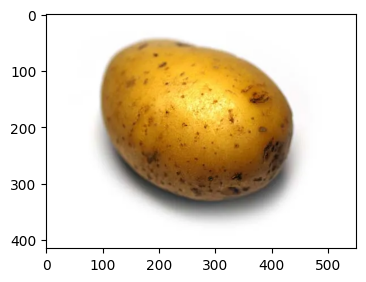

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicción: Potato


'Potato'

In [25]:
# Cargar la imagen
img_2_predict = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TMIP_B_2024/potato.webp')
img_2_predict = cv2.cvtColor(img_2_predict, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.figure(figsize=(4,4))
plt.imshow(img_2_predict)
plt.show()

# Predecir la clase de la imagen
predict_new_image(img_2_predict)

### Parte 2°

### Arquitectura 1: CNN básica

In [23]:
# Arquitectura 1: CNN básica
cnn_model_1 = Sequential()

# Primera capa convolucional
cnn_model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_model_1.add(MaxPool2D(pool_size=(2, 2)))

# Segunda capa convolucional
cnn_model_1.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_1.add(MaxPool2D(pool_size=(2, 2)))

# Aplanamiento
cnn_model_1.add(Flatten())

# Capa completamente conectada
cnn_model_1.add(Dense(128, activation='relu'))

# Capa de salida
cnn_model_1.add(Dense(6, activation='softmax'))

# Compilación
cnn_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history_1 = cnn_model_1.fit(train_data_flow, epochs=10, validation_data=test_data_flow)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2412 - loss: 1.8899 - val_accuracy: 0.4103 - val_loss: 1.5760
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6511 - loss: 1.0004 - val_accuracy: 0.4211 - val_loss: 1.9118
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6906 - loss: 0.8418 - val_accuracy: 0.4727 - val_loss: 1.8230
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8152 - loss: 0.5127 - val_accuracy: 0.5078 - val_loss: 2.0039
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8422 - loss: 0.4483 - val_accuracy: 0.4659 - val_loss: 2.5598
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8445 - loss: 0.3822 - val_accuracy: 0.5209 - val_loss: 2.2874
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8470 - loss: 0.3727 - val_accuracy: 0.5668 - val_loss: 2.3269
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9135 - loss: 0.2463 - val_accuracy: 0.5924 - val_loss:

### Arquitectura 2: CNN más profunda

In [24]:
# Arquitectura 2: CNN más profunda
cnn_model_2 = Sequential()

# Primera capa convolucional
cnn_model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_model_2.add(MaxPool2D(pool_size=(2, 2)))

# Segunda capa convolucional
cnn_model_2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_2.add(MaxPool2D(pool_size=(2, 2)))

# Tercera capa convolucional
cnn_model_2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_2.add(MaxPool2D(pool_size=(2, 2)))

# Aplanamiento
cnn_model_2.add(Flatten())

# Capa completamente conectada
cnn_model_2.add(Dense(128, activation='relu'))

# Capa de salida
cnn_model_2.add(Dense(6, activation='softmax'))

# Compilación
cnn_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history_2 = cnn_model_2.fit(train_data_flow, epochs=10, validation_data=test_data_flow)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2433 - loss: 1.7340 - val_accuracy: 0.4443 - val_loss: 1.6414
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5745 - loss: 1.1605 - val_accuracy: 0.4433 - val_loss: 1.8145
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6956 - loss: 0.7672 - val_accuracy: 0.4528 - val_loss: 2.1490
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7905 - loss: 0.5743 - val_accuracy: 0.4045 - val_loss: 2.1396
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8052 - loss: 0.5129 - val_accuracy: 0.4136 - val_loss: 2.6669
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7971 - loss: 0.4916 - val_accuracy: 0.5428 - val_loss: 2.0704
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8509 - loss: 0.3751 - val_accuracy: 0.5405 - val_loss: 2.1341
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9024 - loss: 0.2743 - val_accuracy: 0.5169 - val_loss:

### Arquitectura 3: CNN con Dropout

In [26]:
from tensorflow.keras.layers import Dropout

# Arquitectura 3: CNN con Dropout
cnn_model_3 = Sequential()

# Primera capa convolucional
cnn_model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_model_3.add(MaxPool2D(pool_size=(2, 2)))
cnn_model_3.add(Dropout(0.25))  # Añadimos Dropout

# Segunda capa convolucional
cnn_model_3.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_3.add(MaxPool2D(pool_size=(2, 2)))
cnn_model_3.add(Dropout(0.25))  # Añadimos Dropout

# Tercera capa convolucional
cnn_model_3.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_3.add(MaxPool2D(pool_size=(2, 2)))
cnn_model_3.add(Dropout(0.5))  # Añadimos Dropout

# Aplanamiento
cnn_model_3.add(Flatten())

# Capa completamente conectada
cnn_model_3.add(Dense(128, activation='relu'))

# Capa de salida
cnn_model_3.add(Dense(6, activation='softmax'))

# Compilación
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history_3 = cnn_model_3.fit(train_data_flow, epochs=10, validation_data=test_data_flow)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2187 - loss: 1.8306 - val_accuracy: 0.3195 - val_loss: 1.6855
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4917 - loss: 1.3713 - val_accuracy: 0.2986 - val_loss: 1.6669
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5800 - loss: 1.0780 - val_accuracy: 0.4639 - val_loss: 1.6484
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6881 - loss: 0.8090 - val_accuracy: 0.4396 - val_loss: 1.8640
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7523 - loss: 0.6864 - val_accuracy: 0.5067 - val_loss: 1.6758
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7874 - loss: 0.5571 - val_accuracy: 0.5162 - val_loss: 1.6486
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8228 - loss: 0.4693 - val_accuracy: 0.4993 - val_loss: 1.6868
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7782 - loss: 0.5484 - val_accuracy: 0.4821 - val_loss:

### 2. División de datos

In [27]:
train_data_flow = train_data_generator.flow_from_directory(
    data_train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data_flow = train_data_generator.flow_from_directory(
    data_train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 717 images belonging to 6 classes.
Found 0 images belonging to 6 classes.


### 3. Evaluación de rendimiento

In [28]:
# Evaluar modelo en el conjunto de test
test_loss_1, test_acc_1 = cnn_model_1.evaluate(test_data_flow)
test_loss_2, test_acc_2 = cnn_model_2.evaluate(test_data_flow)
test_loss_3, test_acc_3 = cnn_model_3.evaluate(test_data_flow)

# Comparar las precisiones
print(f"Precisión modelo 1: {test_acc_1}")
print(f"Precisión modelo 2: {test_acc_2}")
print(f"Precisión modelo 3: {test_acc_3}")


93/93 ━━━━━━━━━━━━━━━━━━━━ 31s 335ms/step - accuracy: 0.5781 - loss: 2.0811
93/93 ━━━━━━━━━━━━━━━━━━━━ 32s 344ms/step - accuracy: 0.5116 - loss: 2.6580
93/93 ━━━━━━━━━━━━━━━━━━━━ 32s 348ms/step - accuracy: 0.5437 - loss: 1.6213
Precisión modelo 1: 0.5823211669921875
Precisión modelo 2: 0.5016869306564331
Precisión modelo 3: 0.5320512652397156


### 4. Evaluación de rendimiento

In [29]:
# Entrenamiento del modelo 1
history_1 = cnn_model_1.fit(train_data_flow, epochs=10, validation_data=test_data_flow)

# Entrenamiento del modelo 2
history_2 = cnn_model_2.fit(train_data_flow, epochs=10, validation_data=test_data_flow)

# Entrenamiento del modelo 3
history_3 = cnn_model_3.fit(train_data_flow, epochs=10, validation_data=test_data_flow)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8338 - loss: 0.4010 - val_accuracy: 0.5472 - val_loss: 2.3806
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9035 - loss: 0.2484 - val_accuracy: 0.5617 - val_loss: 2.5081
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9422 - loss: 0.1623 - val_accuracy: 0.5752 - val_loss: 2.7036
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9192 - loss: 0.2301 - val_accuracy: 0.5827 - val_loss: 2.4047
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9179 - loss: 0.2159 - val_accuracy: 0.6103 - val_loss: 2.2404
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9289 - loss: 0.1814 - val_accuracy: 0.5837 - val_loss: 2.3630
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9359 - loss: 0.1571 - val_accuracy: 0.5951 - val_loss: 2.8378
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9496 - loss: 0.1788 - val_accuracy: 0.6113 - val_loss:

### 5. Comparación gráfica de los modelos

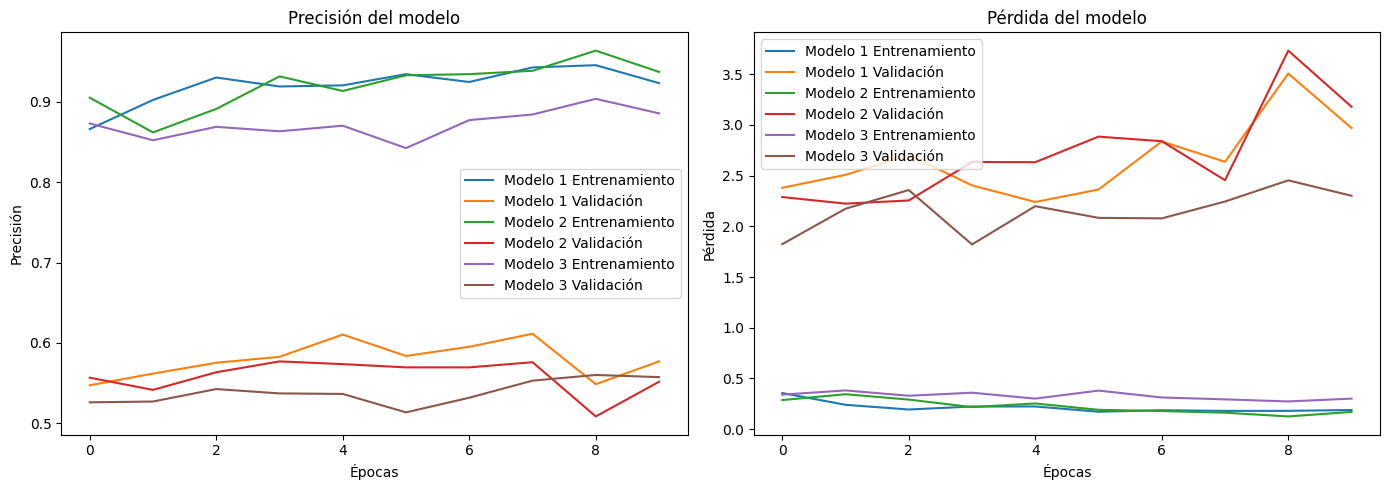

In [30]:
import matplotlib.pyplot as plt

def compare_histories(histories, names):
    # Graficar la precisión
    plt.figure(figsize=(14, 5))

    # Subplot para la precisión
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=f'{name} Entrenamiento')
        plt.plot(history.history['val_accuracy'], label=f'{name} Validación')
    plt.title('Precisión del modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Subplot para la pérdida
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history['loss'], label=f'{name} Entrenamiento')
        plt.plot(history.history['val_loss'], label=f'{name} Validación')
    plt.title('Pérdida del modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Lista de historias y nombres de los modelos
histories = [history_1, history_2, history_3]
names = ['Modelo 1', 'Modelo 2', 'Modelo 3']

# Llamar a la función para comparar los modelos
compare_histories(histories, names)


### Analisis de graficos

| **Característica**           | **Modelo 1**                                | **Modelo 2**                               | **Modelo 3**                             |
|------------------------------|---------------------------------------------|--------------------------------------------|------------------------------------------|
| **Precisión de Entrenamiento**| Alta y estable, cerca de 0.9                | Alta, crece lentamente hasta 0.9           | Moderada, estable alrededor de 0.8       |
| **Precisión de Validación**   | Baja, comienza cerca de 0.5 y sube ligeramente | Inestable, aumenta y luego decae           | Moderada, más estable que otros modelos  |
| **Pérdida de Entrenamiento**  | Baja y constante                            | Relativamente baja y estable               | Moderada, pero constante                 |
| **Pérdida de Validación**     | Alta, apenas mejora                        | Muy variable, con fluctuaciones considerables | Relativamente baja y estable            |
| **Sobreajuste**               | Sí, ajusta bien en entrenamiento pero mal en validación | Sí, inestabilidad en validación           | No tanto, el modelo es más estable       |
| **Generalización**            | Mala, bajo rendimiento en validación        | Inestable, no generaliza bien              | Mejor generalización, aunque con menor precisión |
| **Conclusión**                | Buen ajuste en entrenamiento pero sobreajustado en validación | Inestable en ambos aspectos               | Mejor balance entre entrenamiento y validación, aunque con menor precisión |
